# A simple Gaussian, projected into different number of dimensions

In [27]:
%matplotlib inline
import numpy as np
import numpy.random as rng
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [28]:
def do_plots(data, colour='black'):
    ndims = data.shape[1] # the number of columns
    i = 0
    for r in range(ndims):
        for c in range(ndims):
            i = i+1
            plt.subplot(ndims, ndims, i)
            plt.axis('off')
            if (r <= c):
                plt.scatter(data[:,r], data[:,c], color=colour, marker='.', alpha=0.3)
                a=plt.axis('equal')
                a=plt.axis([-4,4,-4,4])
                plt.text(0,a[2]-1,'%d vs %d' % (r,c))

### Make up some random data from a spherical Gaussian

In [29]:
first_dims, second_dims = 2, 5
first_data = rng.randn(200, first_dims)

In [30]:
print('first_data dimensions:  ', first_data.shape)
X = first_data - np.mean(first_data, axis=0)  # take away the mean
cov_estimate = np.dot(X.T, X) / X.shape[0]
print(cov_estimate)

first_data dimensions:   (200, 2)
[[ 1.13  0.03]
 [ 0.03  1.02]]


### plot some dimensions against others, in the first data space.

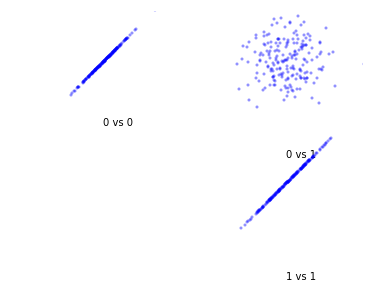

In [31]:
do_plots(first_data, 'blue')

### Project data linearly into a second space with different number of dimensions
oh and I will add a tiny bit of Gaussian noise once we get there too, just so it isn't an infinitely thin pancake...

In [36]:
W = 2 * rng.randn(first_dims, second_dims)
second_data = np.dot(first_data, W)
second_data = second_data + 0.0001*rng.randn(second_data.shape[0], second_data.shape[1])
print('second_data dimensions: ', second_data.shape)
print('weights: \n', W)
X = second_data - np.mean(second_data, axis=0)  # take away the mean
cov_estimate = np.dot(X.T, X) / X.shape[0]
print('cov_estimate: \n', cov_estimate)
#print(np.linalg.inv(cov_estimate))

second_data dimensions:  (200, 5)
weights: 
 [[ 0.87  0.03 -0.21  0.41  1.66]
 [-1.46  0.96 -0.82 -1.12 -0.05]]
cov_estimate: 
 [[ 2.95 -1.38  0.99  2.02  1.64]
 [-1.38  0.94 -0.81 -1.07  0.04]
 [ 0.99 -0.81  0.74  0.83 -0.38]
 [ 2.02 -1.07  0.83  1.44  0.78]
 [ 1.64  0.04 -0.38  0.78  3.11]]


### plot some dimensions against others, in the second data space.

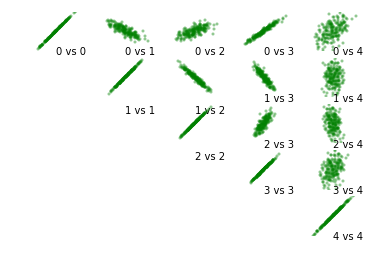

In [37]:
do_plots(second_data, 'green')

## "SVD" is one technique from linear algebra for finding the principal components.

In [38]:
eigenvectors, eigenvalues, V = np.linalg.svd(second_data.T, full_matrices=False)
projected_data = np.dot(second_data, eigenvectors)
sigma = projected_data.std(axis=0).mean()
print("The eigenvalues are:")
print(eigenvalues)
print("\n\n And the eigenvectors are:")
print(eigenvectors)


The eigenvalues are:
[  3.54e+01   2.42e+01   1.54e-03   1.49e-03   1.31e-03]


 And the eigenvectors are:
[[-0.68  0.1   0.72  0.05 -0.01]
 [ 0.3  -0.37  0.39 -0.76  0.21]
 [-0.21  0.4  -0.23 -0.57 -0.65]
 [-0.46  0.2  -0.43 -0.31  0.69]
 [-0.44 -0.81 -0.31 -0.01 -0.25]]


In [39]:
#w,v = np.linalg.eig((np.dot(W.T, W)))
#print('eigenvals: ', w)
#print('eigenvecs: \n',v)